In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm, trange
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv('diamonds.csv')

dummy = df.copy()
dummy.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(dummy.cut.unique())
print(dummy.color.unique())
print(dummy.clarity.unique())

print(f'Total Rows: {len(dummy)}')
print(f'Null Values: {np.sum(dummy.isnull().values)}')

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
Total Rows: 53940
Null Values: 0


In [4]:
#Update to ordinal values 0-n based on feature description
dummy.cut = dummy.cut.replace({'Fair': 0,'Good': 1,'Very Good': 2,'Premium': 3,'Ideal': 4})
dummy.color = dummy.color.replace({'J': 0,'I': 1,'H': 2,'G': 3,'F': 4,'E': 5,'D': 6}) 
dummy.clarity = dummy.clarity.replace({'I1': 0,'SI2': 1,'SI1': 2,'VS2': 3,'VS1': 4,'VVS2': 5,'VVS1': 6, 'IF': 7})

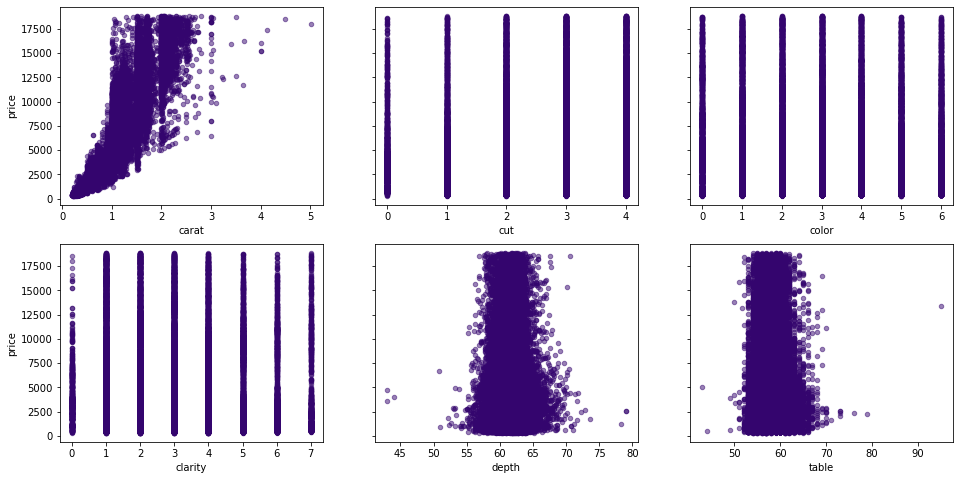

In [5]:
feature_cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table']

fig, axs = plt.subplots(2, 3, figsize=(16, 8), sharey=True)

dummy.plot(kind='scatter', x='carat', y='price', ax=axs[0,0], color='#34056e', alpha=0.5)
dummy.plot(kind='scatter', x='cut', y='price', ax=axs[0,1], color='#34056e', alpha=0.5)
dummy.plot(kind='scatter', x='color', y='price', ax=axs[0,2], color='#34056e', alpha=0.5)
dummy.plot(kind='scatter', x='clarity', y='price', ax=axs[1,0], color='#34056e', alpha=0.5)
dummy.plot(kind='scatter', x='depth', y='price', ax=axs[1,1], color='#34056e', alpha=0.5)
dummy.plot(kind='scatter', x='table', y='price', ax=axs[1,2], color='#34056e', alpha=0.5)

fig.savefig('model_vars.png', dpi='figure')
plt.show()

In [6]:
dummy[['table', 'depth']] = preprocessing.normalize(dummy[['table', 'depth']])
dummy.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,5,1,0.745400,0.666618,326,3.95,3.98,2.43
1,2,0.21,3,5,2,0.700048,0.714096,326,3.89,3.84,2.31
2,3,0.23,1,5,4,0.658668,0.752433,327,4.05,4.07,2.31
3,4,0.29,3,1,3,0.732459,0.680811,334,4.20,4.23,2.63
4,5,0.31,1,0,1,0.737299,0.675566,335,4.34,4.35,2.75


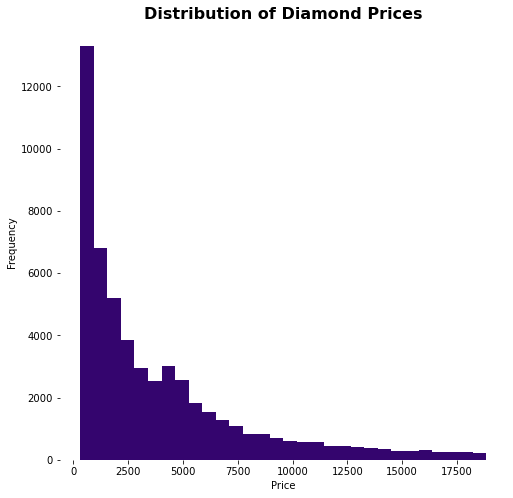

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

dummy.hist(column='price', grid=False, bins=30, ax=ax, color='#34056e')
plt.title('Distribution of Diamond Prices', fontsize=16, weight='bold')
plt.ylabel('Frequency')
plt.xlabel('Price')

fig.savefig('prices-dist.png', dpi='figure')
plt.show()

In [8]:
"""
Dropped x,y,z due to depth itself is a better predictor based on
previous tests and improved test accuracy by .5%
"""
df_features = dummy.drop(['price', 'Unnamed: 0', 'x', 'y', 'z'], axis=1)

df_features.head()

,carat,cut,color,clarity,depth,table
0,0.23,4,5,1,0.745400,0.666618
1,0.21,3,5,2,0.700048,0.714096
2,0.23,1,5,4,0.658668,0.752433
3,0.29,3,1,3,0.732459,0.680811
4,0.31,1,0,1,0.737299,0.675566


In [9]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()

for seedN in trange(1, 21):
    X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                        df['price'],
                                                        test_size=0.2,
                                                        random_state=seedN)
    training_accuracy = []
    test_accuracy = []

    neighbors_settings = range(1, 51)

    for n_neighbors in tqdm(neighbors_settings):
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        training_accuracy.append(reg.score(X_train, y_train))
        test_accuracy.append(reg.score(X_test, y_test))
    all_training[seedN] = training_accuracy
    all_test[seedN] = test_accuracy

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

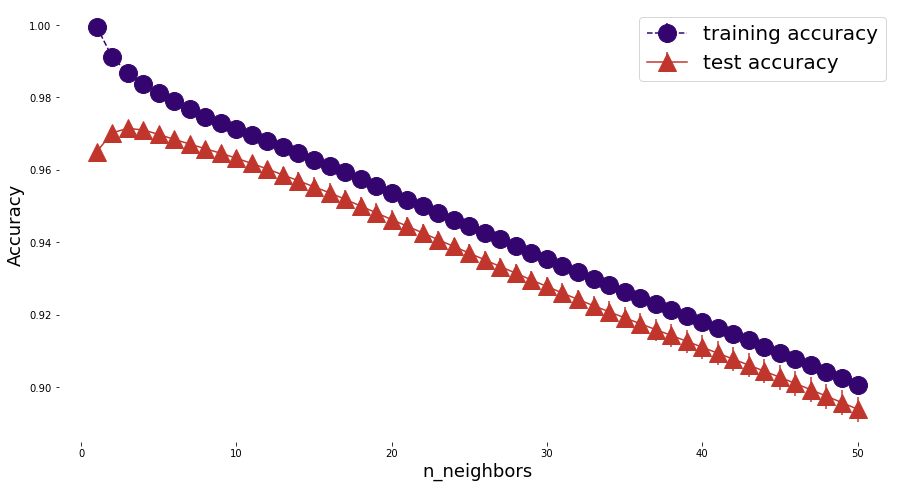

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor('white')

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings,
             all_training.mean(axis=1),
             yerr=all_training.std(axis=1),
             label="training accuracy",
             color='#34056e',
             marker='o',
             linestyle='dashed',
             markersize=18)

plt.errorbar(neighbors_settings,
             all_test.mean(axis=1),
             yerr=all_test.std(axis=1),
             label="test accuracy",
             color='#c0362d',
             marker='^',
             linestyle='-',
             markersize=18)

plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors", fontsize=18)
plt.legend()

fig.savefig('accuracy.png', dpi='figure')
plt.show()

In [11]:
print(f'Highest Accuracy: {max(all_test.mean(axis=1))}')

k_optim = np.argmax(all_test.mean(axis=1)) + 1
print(f'KNN: {k_optim}')
all_test.mean(axis=1)

Highest Accuracy: 0.9714486037235017
KNN: 3


0     0.964977
1     0.970229
2     0.971449
3     0.971034
4     0.969787
5     0.968420
6     0.967132
7     0.965836
8     0.964591
9     0.963218
10    0.961759
11    0.960229
12    0.958598
13    0.956977
14    0.955306
15    0.953679
16    0.951873
17    0.950022
18    0.948142
19    0.946261
20    0.944433
21    0.942585
22    0.940691
23    0.938832
24    0.936989
25    0.935125
26    0.933272
27    0.931435
28    0.929579
29    0.927778
30    0.925968
31    0.924194
32    0.922472
33    0.920788
34    0.919131
35    0.917505
36    0.915867
37    0.914264
38    0.912643
39    0.911001
40    0.909340
41    0.907703
42    0.906040
43    0.904374
44    0.902685
45    0.900981
46    0.899233
47    0.897478
48    0.895680
49    0.893888
dtype: float64

0.9718694378652762


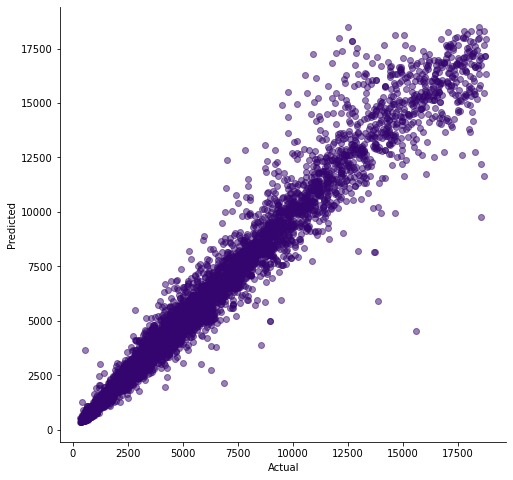

In [12]:
from sklearn.metrics import r2_score

reg = KNeighborsRegressor(n_neighbors=k_optim)
X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    df['price'],
                                                    test_size=0.2,
                                                    random_state=1)
reg.fit(X_train, y_train)


fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.plot(y_test, reg.predict(X_test), 'o', color='#34056e', alpha=0.5)

plt.xlabel("Actual")
plt.ylabel("Predicted")

print(r2_score(y_test, reg.predict(X_test)))

fig.savefig('pred-vs-actual.png', dpi='figure')

In [14]:
from sklearn.metrics import mean_squared_error

test_rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
print(f'Test RMSE: {test_rmse}')

Test RMSE: 661.1407395895437
